第5回の演習です。ここでは、外部モジュールOpenCVの基本を説明します。
左上の「ファイル」＞「ドライブにコピーを保存」を選択して、Google DriveにNotebookを保存します。ご自身のGoogleドライブの"Colab Notebooks"フォルダで、保存したNotebookを右クリックし、「アプリで開く」＞「Google Colaboratory」を選択します。その上で、各コードを実行するには、以下のコマンドを実行してください。実行は「再生」ボタンを押します。

In [ ]:
print("Chapter 5")

Chapter 5


# OpenCV
OpenCVはオープンソースの画像処理ライブラリで、コンピュータで画像を処理したり機械学習したりする機能を提供します。その機能は多様で高度であり、深層学習の画像データを前処理するのに大変有用です。元々、Intelが開発したもので、正式名称はOpen Source Computer Vision Libraryです。この演習で示されるプログラムコードは基本的に、[OpenCVのWebサイト](https://opencv.org/)で示されているデモやチュートリアルをベースにしています。

## 画像ファイルの用意
まず、OpenCVでの処理に使う画像を用意します。画像はどんなものでもよいのですが、ファイルサイズがあまり大きいと、その後の処理が重たくなるかも知れません。適当な画像ファイルがない、という方はココ([manapi02.png](https://drive.google.com/file/d/1GJfBAoxRyoEcxCnIp87VUL9KWqdUeeLT/view?usp=sharing))からダウンロードして下さい。

画像をファイルとしてGoogle Colaboratory上にアップロードしますので、そのためのfilesモジュールをインポートします。「ファイル選択」というボタンが表示されますので、これをクリックしてアップロードする画像ファイルを選択します。注意点は、アップロードしたデータは永久保存されないということです。Notebookの実行環境がリセットされると、アップロードしたデータは消えます。

In [5]:
# ローカル環境では直接画像ファイルを指定
import os
image_filename = "example.png"

適切にアップロードされたら、「...100% done, Saving ファイル名 to ファイル名」といったメッセージが出ます。アップロードされたファイルを確認するには、以下のコマンドを使ってファイルを表示してみます。type関数は、変数の型を調べるのでした。

In [ ]:
# ローカル環境では不要
print(f"使用する画像ファイル: {image_filename}")

"dict_items"の後に、（ファイル名, データ）という形式でデータが表示されていると想定されます。<class 'dict_items'>と表示されているのは、画像ファイルが辞書型になっているという意味です。辞書は、キーと値を組み合わせたリストです。キーを参照することで、辞書から値を抽出することができます。' 'の前についている"b"は、このデータがバイナリデータであることを示しています。上記のitemsメソッドは、辞書のキーと値の対(key, value)を返します。keysメソッドは辞書のキーの一覧を返します。valuesメソッドは値の一覧を返します。

In [ ]:
# ローカル環境では不要
print(f"ファイルが存在するか確認: {os.path.exists(image_filename)}")

次に、ファイル名を取得し、OpenCVでこの画像ファイルを読み込めるようにします。
画像のファイル名は辞書のキーに入っていますから、keysメソッドでこれを取り出します。このままだと、取り出したキーの変数も辞書型になりますから、list関数で辞書型をリスト型に変換します。その上で、リストの最初の要素（行）を取り出し、ファイル名とします。

In [ ]:
# 画像のファイル名を確認
print(f"使用する画像ファイル: {image_filename}")
print(f"ファイルパス: {os.path.abspath(image_filename)}")

## OpenCVの準備
次に、OpenCVをインポートして、OpenCVを使うための準備を行います。OpenCVで読み込んだ画像データを配列として扱うために、NumPyを使います。

In [8]:
# OpenCVを使う準備
import cv2
import numpy as np

画像ファイルを読み込むには、imread関数を使います。また、読み込んだ画像ファイルを表示するには、OpenCVのimshow関数を使います。このimshow関数は、BGRデータを画像に変換する働きがあります。画像として描画する用意をするだけなのですが、ここではGoogle ColaboratoryのNotebook上に画像を表示したいので、Google Colaboratoryから提供されるモジュールを使います。

In [ ]:
cv_img = cv2.imread(image_filename)

# ローカル環境ではmatplotlibを使用して画像表示する関数を定義
import matplotlib.pyplot as plt

def show_image(img, title="Image", cmap=None):
    plt.figure(figsize=(8, 6))
    
    # Convert to uint8 if needed
    if img.dtype != np.uint8:
        img = np.uint8(img)
    
    if len(img.shape) == 3:
        # カラー画像の場合、BGR→RGB変換
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        # グレースケール画像の場合
        plt.imshow(img, cmap='gray' if cmap is None else cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(cv_img, "Original Image")

画像が表示されました。ここで、画像の生データを確認してみましょう。[255, 255, 255]といった配列が多数並んでいることがわかります。この配列は、画像上の画素の画素値をBGRごとに表しています。

In [10]:
print(len(cv_img))
print(cv_img)

708
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


## 画像データの解析
ここで、もう少し画像の生データを調べて、画像に変更を加えていきましょう。実は、読み込まれた画像データはNumPy配列ndarrayになっています。画像データの型をtype関数で確認しましょう。次に、配列の形状を求め、その構造を確認します。shapeメソッドの実行結果は（縦のデータ数、横のデータ数、色のチャネル数）を表します。それと、OpenCVの画像データでは色の成分がRGBではなく、BGRになっています。配列の0番目（B：青）と1番目（G：緑）を"0"（黒）に設定して確認しましょう。ここで、スライスの記号":"はすべての要素を指定します。

<class 'numpy.ndarray'>
(708, 708, 3)


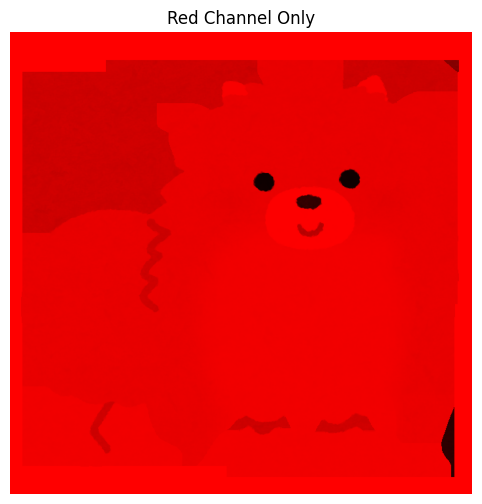

In [11]:
# 画像データの型・形状
print(type(cv_img))           # 型
print(cv_img.shape)           # 形状
# 色の青成分と緑成分を"0"に設定
x = np.array(cv_img)
x[:, :, (0, 1)] = 0           # 赤成分だけを残す
show_image(x, "Red Channel Only")

では、色のBGR（青緑赤）表現をグレースケールの表現に変換すると、どうなるでしょう。cvtColor関数は、画像データの色調を変換する機能があります。第1引数に画像データを、第2引数にCOLOR_BGR2GRAY（グレースケールへの変換）を設定しています。

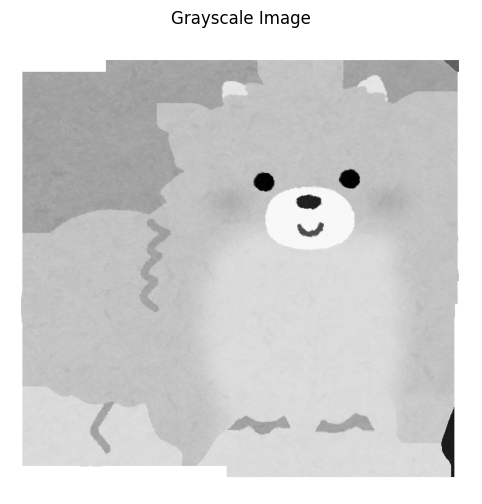

In [12]:
# RGBデータをグレースケールのデータに変換
img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
show_image(img_gray, "Grayscale Image")

ここで、一旦、グレースケールに変換した画像データをファイルとして保存しておきましょう。画像を保存するための関数はimwrite（ファイル名, 画像データ）です。

In [13]:
# 画像の保存
cv2.imwrite("manapi_gray.png", img_gray)

True

"True"と表示されれば、画像ファイルの保存は成功です。と、画像ファイルはどこに保存されたのでしょうか。実は、Google Colaboratory上にあります。サイドバーの「フォルダ」アイコンをクリックすると、Google Colaboratory上にあるファイルの一覧を確認できます。「画像ファイルの用意」で書きましたように、Google Colaboratory上のデータは永久保存されず、Notebookの実行環境がリセットされれば、これらのデータは消えます。そこで、自身のコンピュータにダウンロードしておきます。やり方は、ファイル名のところにマウス・カーソルを持っていき、右側に表示される「：」を左クリックし、「ダウンロード」を選択します。

# 画像の加工
ここからは、画像を加工する機能を色々と見ていくことにします。

## 切り抜き（トリミング）
まずは、画像の一部分を切り出します。画像の不要部分を切り取って、必要な部分を抜き出す処理をトリミングと言います。ここでは、画像の縦と横のサイズをそれぞれ半分のところで切り落とすことにします。

切り抜き処理後の画像の形状 (354, 354, 3)


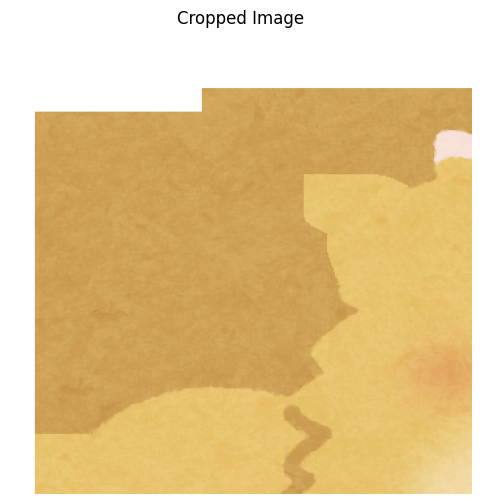

In [14]:
# 画像の切り抜き
size = cv_img.shape                             # 画像データの形状を取得
img = cv_img[:size[0] // 2, :size[1] // 2]      # size[0]は縦の画素数、size[1]は横の画素数
print("切り抜き処理後の画像の形状", img.shape)
show_image(img, "Cropped Image")

## 拡大・縮小
画像を拡大あるいは縮小し、画像のサイズを変更します。例えば、画像を拡大する場合、画像データの配列を増やしますので、データ容量は増加します。resize関数を使います。引数は、（画像データ, dsize =（横の画素数, 縦の画素数））のように設定します。注意点は、引数dsizeの画素数を（横・縦）の順に指定することです。

元の画像の形状 (708, 708, 3)
拡大画像の形状 (1416, 1416, 3)


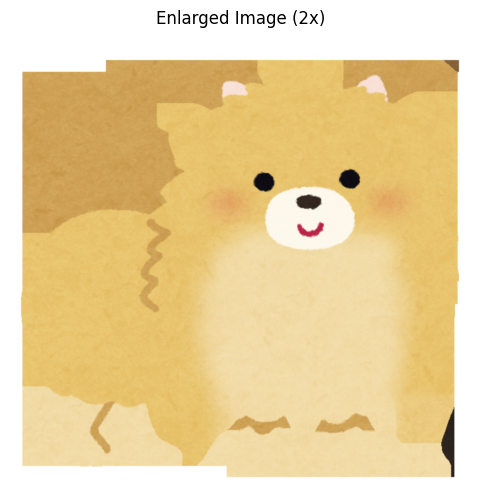

In [15]:
size = cv_img.shape                             # 画像の形状（縦横の画素数）を取得
print("元の画像の形状", size)
size_img = cv2.resize(cv_img, dsize = (size[1] * 2, size[0] * 2))
print("拡大画像の形状", size_img.shape)         # 拡大した後の画像のサイズを取得
show_image(size_img, "Enlarged Image (2x)")

次に、画像を縮小してみましょう。画像を縮小する場合、画像データの配列を減らしますので、データ容量は減少します。ここでもresize関数を使います。引数は、画像の拡大のときと同じように設定します。

In [ ]:
size = cv_img.shape                             # 画像の形状（縦横の画素数）を取得
print("元の画像の形状", size)
size_img = cv2.resize(cv_img, dsize = (size[1] // 10, size[0] // 10))
print("縮小画像の形状", size_img.shape)         # 縮小した後の画像のサイズを取得
show_image(size_img, "Reduced Image (1/10x)")

## 画像の回転
次に、画像を回転してみましょう。画像を回転するにはwarpAffine関数を使います。warpAffine関数はアフィン変換を行い、その引数に（画像データ, M, dsize）を指定します。2番目の引数Mは変換行列、3番目の引数dsizeは画像のサイズを指定します。変換行列はNumPy配列で与え、getRotationMatrix2D関数で生成することができます。この関数の引数に（回転中心, 回転角, 拡大・縮小の倍率）を指定します。回転角はradianではなく、角度で与えます。

In [ ]:
# 画像の回転（45度）
h, w, ch = cv_img.shape                                       # 画像データの形状（縦, 横, 色のチャネル数）
print(h, w, ch)
mat = cv2.getRotationMatrix2D((w / 2, h / 2), 45, 1.0)        # 変換行列（回転中心は画像の中心位置）
rot_img = cv2.warpAffine(cv_img, mat, (w, h))                 # アフィン変換
show_image(rot_img, "Rotated Image (45°)")

画像は回転しましたが、画像の四隅が欠けてしまったと想定されます。これだと情報が失われることになりますから、機械学習の学習データとして使うことを考えると好ましいことではありません。getRotation Matrix2Dの引数を変更し、画像を縮小します。ついでに回転角度も変えてみましょう。

In [ ]:
# 画像の回転（-45度）
h, w, ch = cv_img.shape                                       # 画像データの形状（縦, 横, 色のチャネル数）
print(h, w, ch)
mat = cv2.getRotationMatrix2D((w / 2, h / 2), -45, 0.5)       # 変換行列（回転中心は画像の中心位置）
rot_img = cv2.warpAffine(cv_img, mat, (w, h))                 # アフィン変換
show_image(rot_img, "Rotated Image (-45°, 0.5x scale)")

warpAffine関数の引数にflagsを指定すると、補間処理が働きます。ここでは詳しく説明しませんが、画像を回転すると、元の画像と回転した画像とで画素の中心がズレるという現象が発生します。この影響を抑えるため、補間処理を行います。ただ、画像の解像度が高いときは、見た目にあまり違いはないかも知れません。

In [ ]:
# 画像の回転（補間処理：bicubic）
h, w, ch = cv_img.shape                                       # 画像データの形状（縦, 横, 色のチャネル数）
print(h, w, ch)
mat = cv2.getRotationMatrix2D((w / 2, h / 2), -45, 0.5)       # 変換行列（回転中心は画像の中心位置）
rot_img = cv2.warpAffine(cv_img, mat, (w, h), flags=cv2.INTER_CUBIC)                 # アフィン変換（bicubic補間）
show_image(rot_img, "Rotated Image with Bicubic Interpolation")

画像を回転して気になる点は、画像以外の領域の扱いです。これまでは何も処理していませんから、真っ黒になっていました。warpAffine関数の引数にboaderModeを設定すると、領域外を埋めることができます。引数boaderModeにcv2.BORDER_CONSTANTを指定すると固定値になり、その値は引数borderValueで指定します。

In [ ]:
# 画像の回転（領域外処理：一様な色）
h, w, ch = cv_img.shape                                       # 画像データの形状（縦, 横, 色のチャネル数）
print(h, w, ch)
mat = cv2.getRotationMatrix2D((w / 2, h / 2), -45, 0.5)       # 変換行列（回転中心は画像の中心位置）
rot_img = cv2.warpAffine(cv_img, mat, (w, h), flags=cv2.INTER_CUBIC,                    # アフィン変換（bicubic補間）
                         borderMode = cv2.BORDER_CONSTANT, borderValue=(255, 255, 0))   # 領域外処理（BGR）
show_image(rot_img, "Rotated Image with Constant Border Fill")

引数borderModeにcv2.BORDER_TRANSPARENTを指定すると、別の画像が背景に設定されます。引数dstで背景画像を設定します。

In [ ]:
# 画像の回転（領域外処理：背景画像）
h, w, ch = cv_img.shape                                       # 画像データの形状（縦, 横, 色のチャネル数）
print(h, w, ch)
mat = cv2.getRotationMatrix2D((w / 2, h / 2), -45, 0.5)       # 変換行列（回転中心は画像の中心位置）
dst1 = cv_img // 4
rot_img = cv2.warpAffine(cv_img, mat, (w, h), flags=cv2.INTER_CUBIC,                # アフィン変換（bicubic補間）
                         borderMode = cv2.BORDER_TRANSPARENT, dst = dst1)           # 領域外処理（背景画像）
show_image(rot_img, "Rotated Image with Background Image")

引数borderModeにBORDER_WRAPを指定すると、領域外に画像が繰り返し表示されます。

In [ ]:
# 画像の回転（領域外処理：繰り返し）
h, w, ch = cv_img.shape                                       # 画像データの形状（縦, 横, 色のチャネル数）
print(h, w, ch)
mat = cv2.getRotationMatrix2D((w / 2, h / 2), -45, 0.5)       # 変換行列（回転中心は画像の中心位置）
dst1 = cv_img // 4
rot_img = cv2.warpAffine(cv_img, mat, (w, h), flags=cv2.INTER_CUBIC,         # アフィン変換（bicubic補間）
                         borderMode = cv2.BORDER_WRAP)                       # 領域外処理（繰り返し）
show_image(rot_img, "Rotated Image with Wrap Border Mode")